In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random

In [152]:
def question2(epsilon, n = 5000, pA = 0.7, pB = 0.5):
#     Initialisation
    x = [] # liste de stockage des Xi
    E = [] #liste de stockage des couples (Ei, Xi)
    S = [] 
    
    
    x1 = isClique(pA)
    x2 = isClique(pB)
    x.append(x1)
    x.append(x2)
    E.append([pA,x1])
    E.append([pB,x2])
    S.append(x1)
    S.append((x1 + x2)/2)
    
    nbClicsA = x1
    nbClicsB = x2
    nbAffichagesA, nbAffichagesB = 1,1
    
    tauxA = tauxSucces(E, pA)
    tauxB = tauxSucces(E, pB)
    p=0
    
    
#     Récurrence
    for i in range(3, n):
        alea = random.random()
        if tauxA > tauxB: 
            if (1 - epsilon > alea):
                p = pA
                nbAffichagesA += 1
            else: 
                p = pB
                nbAffichagesB += 1
        elif tauxA < tauxB:
            if (1 - epsilon > alea):
                p = pB
                nbAffichagesB += 1
            else:
                p = pA
                nbAffichagesA += 1
        else:
            alea = random.random()
            if alea > 0.5:
                p = pA
                nbAffichagesA += 1
            else:
                p=pB
                nbAffichagesB += 1
        
        X = isClique(p)
        if p == pA:
            nbClicsA += X
        else:
            nbClicsB += X
        
        E.append((p,X))
        tauxA = nbClicsA / nbAffichagesA
        tauxB = nbClicsB / nbAffichagesB
        x.append(X)
        S.append(sum(x[:i])/i)
#     return x
    plt.plot(range(1,n,1), S)
    plt.legend("{}".format(epsilon))

def tauxSucces(E, p):
    s= 0
    for couple in E:
        if couple[0] == p:
            s += couple[1]
    publicites = [row[0] for row in E]     
    return s/(publicites.count(p))

def isClique(p):
    rand = random.random()
    if p> rand:
        return 1
    else:
        return 0
    
    

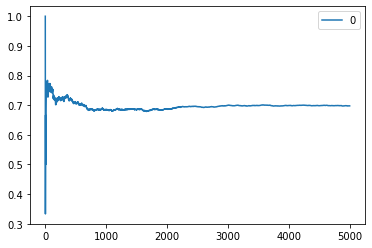

In [153]:
question2(0.01)
# isClique(0.4)

In [154]:
def differentsEpsilon():
    for epsilon in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]:
        print(question2(epsilon))

None
None
None
None
None
None
None


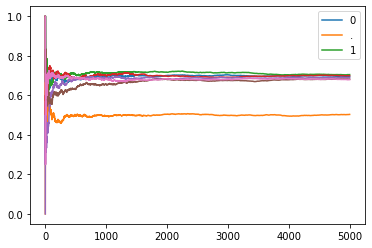

In [155]:
differentsEpsilon()

# Question 3 

In [156]:
def question3():
    X=[]
    res = []
    epsilon = 0.01
    for i in range (1, 1000):
        X.append(question2(epsilon))
    X = np.array(X) 
    S = []
    for k in range (1, 999):
        S.append((X[:, k].sum())/1000)
        res.append(sum(S[:k])/k)
    plt.plot(range(2,1000,1), res)


In [157]:
X = np.array([[2,21],[3,5]])

In [158]:
X[:, 1]

array([21,  5])

IndexError: too many indices for array

C:\Users\Olivier Desclaux\Anaconda3\envs\map572\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Olivier Desclaux\Anaconda3\envs\map572\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


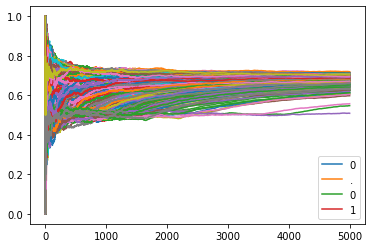

In [159]:
question3()

# Question 4

In [115]:
def question4(n = 1000, pA = 0.6, pB = 0.4):
#     Initialisation
    x = [] # liste de stockage des Xi
    E = [] #liste de stockage des couples (Ei, Xi)
    S = [] 
    
    
    x1 = isClique(pA)
    x2 = isClique(pB)
    x.append(x1)
    x.append(x2)
    E.append([pA,x1])
    E.append([pB,x2])
    S.append(x1)
    S.append((x1 + x2)/2)
    
    nbClicsA = x1
    nbClicsB = x2
    nbAffichagesA, nbAffichagesB = 1,1
    
    tauxA = tauxSucces(E, pA)
    tauxB = tauxSucces(E, pB)
    p=0
    
    
#     Récurrence
    for i in range(3, n):
        if tauxA > tauxB: 
            p = pA
            nbAffichagesA += 1
        elif tauxA < tauxB:
            p = pB
            nbAffichagesB += 1
        else:
            alea = random.random()
            if alea > 0.5:
                p = pA
                nbAffichagesA += 1
            else:
                p=pB
                nbAffichagesB += 1
        
        X = isClique(p)
        if p == pA:
            nbClicsA += X
        else:
            nbClicsB += X
        
        E.append((p,X))
        tauxA = nbClicsA / nbAffichagesA
        tauxB = nbClicsB / nbAffichagesB
        x.append(X)
        S.append(sum(x[:i])/i)
    return x
    plt.plot(range(1,n,1), S)
    plt.legend("{}".format(epsilon))

def tauxSucces(E, p):
    s= 0
    for couple in E:
        if couple[0] == p:
            s += couple[1]
    publicites = [row[0] for row in E]     
    return s/(publicites.count(p))

def isClique(p):
    rand = random.random()
    if p> rand:
        return 1
    else:
        return 0
    
    

# Pierre Feuille Ciseau

In [164]:
def ReponseStrategie(L):
    coupJoue = np.argmax(L)
    if coupJoue ==  0:
        return [0,1,0]
    elif coupJoue == 1:
        return [0,0,1]
    else:
        return [1,0,0]
        

In [165]:
ReponseStrategie([0.1,0.2,0.2])

[0, 0, 1]

In [167]:
def apprentissage(epsilon):
    X = []
    Y = []
    
    
def occurencesEvenement(X, Y):
    XTMoins1 = X[-1]
    YTMoins1 = Y[-1]
    XTMoins2 = X[len(X) - 2]
    YTMoins2 = Y[len(Y) - 2]
    
    M = []
    for i in range (len(X) - 1):
        M.append([[X[i], Y[i]]], [X[i+1], Y[i+1]])
    
    derniereOccurence = [[XTMoins2, YTMoins2], [XTMoins1, YTMoins1]]
    S = []
    for i in range (len(M)-1):
        if derniereOccurence == M[i]:
            S.append(M[i+1][0][1])
    return S